In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1.Load the data from “cereal.csv” and plot histograms of sugar and vitamin content across different cereals.

In [4]:
df=pd.read_csv('c:/edureka/cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [81]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating', 'Manufactures_Name'],
      dtype='object')

In [11]:
Sugar=df['sugars']
Vitamin=df['vitamins']

(array([ 8.,  4., 13.,  6.,  7.,  9.,  9.,  5., 11.,  5.]),
 array([-1. ,  0.6,  2.2,  3.8,  5.4,  7. ,  8.6, 10.2, 11.8, 13.4, 15. ]),
 <a list of 10 Patch objects>)

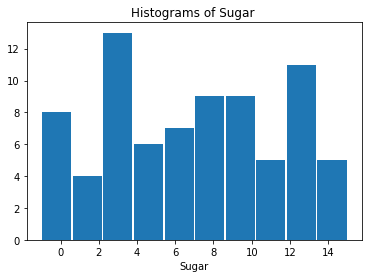

In [31]:
plt.xlabel('Sugar')

plt.title('Histograms of Sugar ')
plt.hist(Sugar,rwidth=0.95)

(array([71.,  0.,  6.]),
 array([  0.        ,  33.33333333,  66.66666667, 100.        ]),
 <a list of 3 Patch objects>)

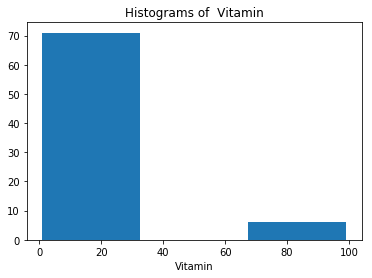

In [30]:
plt.xlabel('Vitamin')

plt.title('Histograms of  Vitamin')
plt.hist(Vitamin,bins=3,rwidth=0.95)

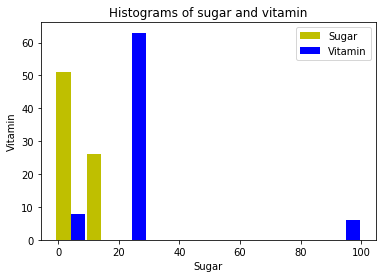

In [32]:
plt.xlabel('Sugar')
plt.ylabel('Vitamin')
plt.title('Histograms of sugar and vitamin')
plt.hist([Sugar,Vitamin],rwidth=0.95,color=['y','b'],label=['Sugar','Vitamin'])
plt.legend()

# 2. The names of the manufactures are coded using alphabets, create a new column with their full name using the below mapping.

In [34]:
manufactures={
    'N': 'Nabisco',
    'Q': 'Quaker Oats',
    'K': 'Kelloggs',
    'R': 'Raslston Purina',
    'G': 'General Mills' ,
    'P' :'Post' ,
    'A':'American Home Foods Products'
}
manufactures

{'N': 'Nabisco',
 'Q': 'Quaker Oats',
 'K': 'Kelloggs',
 'R': 'Raslston Purina',
 'G': 'General Mills',
 'P': 'Post',
 'A': 'American Home Foods Products'}

In [36]:
df['Manufactures_Name'] = df['mfr'].map(manufactures)

In [39]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Manufactures_Name
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina


# Create a bar plot where each manufacturer is on the y axis and the height of the bars depict the number of cereals manufactured by them.

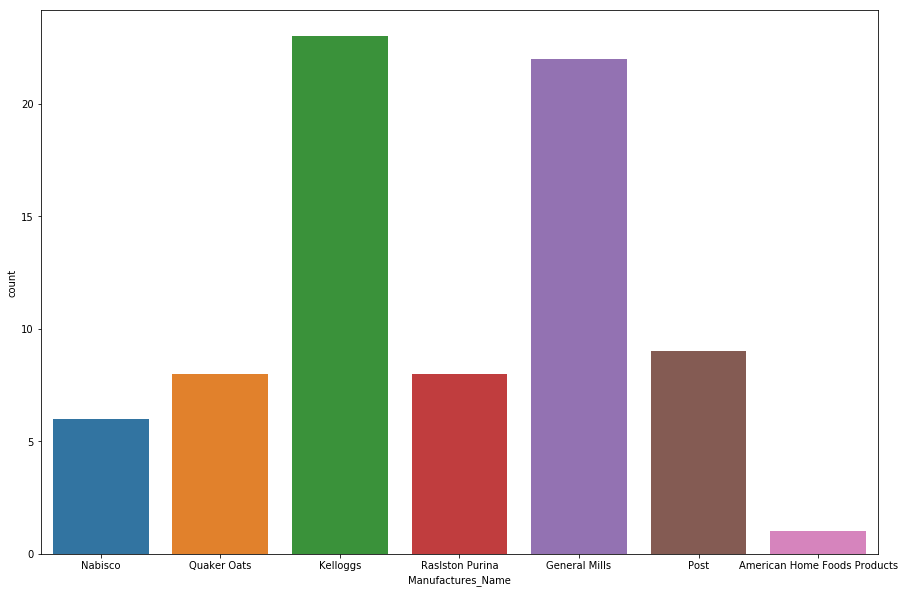

In [53]:
from seaborn import countplot
import seaborn as sns
figure(figsize=(15,10))
sns.countplot(x='Manufactures_Name',data=df)


# 3. Extract the rating as your target variable ‘y’ and all numerical parameters as your predictors ‘x’. Separate 25% of your data as test set.

In [82]:
X=df[['calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']]
y = df['rating'] 
print(X.shape)
print(y.shape)

(77, 12)
(77,)


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [84]:

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(57, 12) (57,)
(20, 12) (20,)


# 4. Fit a linear regression module and measure the mean squared error on test dataset.

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [89]:
linreg = LinearRegression()
linreg = linreg.fit(X_train,y_train)

r2_score=linreg.score(X_test,y_test)
print(r2_score)



0.999999999999999


In [88]:
predictions = linreg.predict(X_test)

predictions

array([33.17409432, 32.20758141, 40.91704684, 33.98367891, 27.753301  ,
       28.0257645 , 28.74241356, 53.37100746, 64.53381604, 55.33314199,
       59.64283669, 36.18755867, 39.10617426, 31.43597278, 59.42550463,
       40.69232043, 41.99893303, 58.34514152, 37.1368635 , 29.50954054])